Introduction:

This notebook aims to solve a handwriting recognition problem where a school wants to predict what numbers students have written using their handwriting samples. We start by building a KNN model and compare it with a more complex neural network model. Additionally, we apply dimensionality reduction techniques (PCA) to optimize the models.

Step 1: Data Loading and Initial Exploration

In this step, we load the dataset, check the structure, descriptive statistics, and ensure there are no missing values.

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'letters.csv'  # Make sure to adjust this path to where the file is located
data = pd.read_csv(file_path)

# First 5 rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Descriptive statistics of the dataset
print("\nDescriptive Statistics of the dataset:")
print(data.describe())

# Distribution of the target variable (label)
print("\nDistribution of target variable (label):")
print(data['label'].value_counts())

# Checking for missing values
print("\nChecking for missing values in the dataset:")
print(data.isnull().sum())


First 5 rows of the dataset:
   label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  pixel127  \
0      1        0        0        0         0         0         0         0   
1      0        0        0        0       137       137       192        86   
2      1        0        0        0         3       141       139         3   
3      4        0        0        0         0         0         0         0   
4      0        0        0        0       155       254       254       254   

   pixel128  pixel129  ...  pixel329  pixel351  pixel410  pixel411  pixel412  \
0         0         0  ...         0       254         0         0         0   
1        72         1  ...       254         0         0        75       254   
2         0         0  ...         0       184         0         0         0   
3         0         0  ...         0         0        94       255        69   
4       157        30  ...       253         0         0         0       223   

   pixel413  pi

Step 2: Data Visualization and Correlation Analysis

We visualize the distribution of the target variable and check for multicollinearity using a correlation matrix.

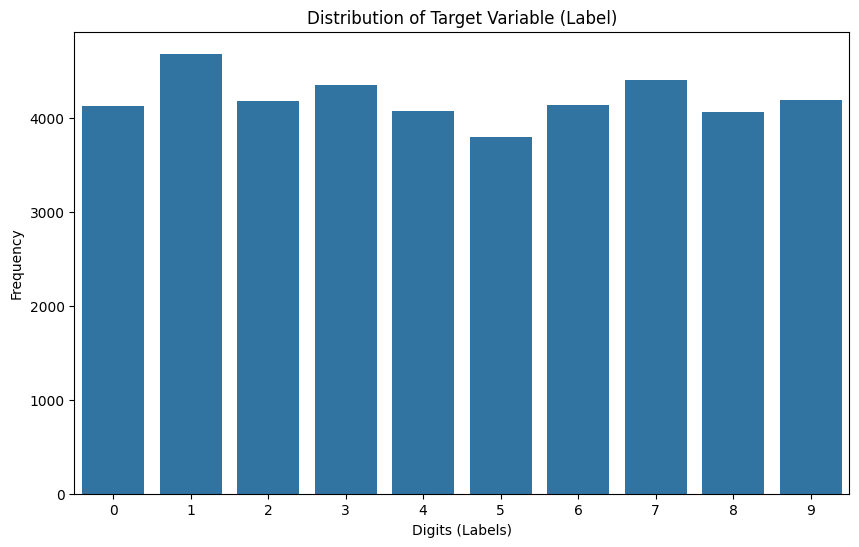

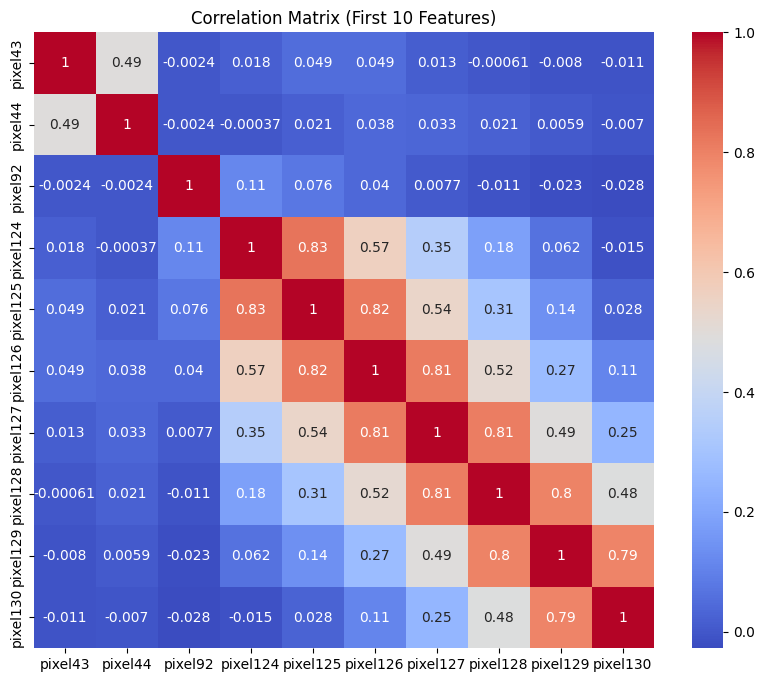

In [9]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=data)
plt.title('Distribution of Target Variable (Label)')
plt.xlabel('Digits (Labels)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix to check multicollinearity (first 10 features)
plt.figure(figsize=(10,8))
corr_matrix = data.iloc[:, 1:11].corr()  # Using only the first 10 features for readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (First 10 Features)')
plt.show()

Step 3: Data Preprocessing with PCA (Principal Component Analysis)

Here, we scale the data, apply PCA to reduce dimensionality while retaining 95% of the variance, and split the dataset into training and testing sets.

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Step 1: Normalize the pixel values to ensure features are on the same scale
scaler = StandardScaler()

# Separate features and labels
X = data.drop(columns=['label'])
y = data['label']

# Normalize the feature values
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to reduce the number of features while retaining 95% of the variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Show the shape of the dataset after applying PCA
print(f"Original shape: {X_scaled.shape}, Shape after PCA: {X_pca.shape}")

# Step 3: Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Print the shape of the new training and testing datasets
print(f"Training set size after PCA: {X_train_pca.shape}, Test set size after PCA: {X_test_pca.shape}")


Original shape: (42000, 45), Shape after PCA: (42000, 26)
Training set size after PCA: (33600, 26), Test set size after PCA: (8400, 26)


Step 4: KNN Model Training and Evaluation

Train the KNN model using the PCA-transformed data and evaluate its performance.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Train the KNN model
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)

# Step 2: Make predictions with KNN
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# Step 3: Evaluate the KNN model
knn_pca_accuracy = accuracy_score(y_test_pca, y_pred_knn_pca)
knn_pca_classification_report = classification_report(y_test_pca, y_pred_knn_pca)

print(f"KNN Model Accuracy after PCA: {knn_pca_accuracy}")
print("\nKNN Classification Report after PCA:")
print(knn_pca_classification_report)

KNN Model Accuracy after PCA: 0.6398809523809523

KNN Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       861
           1       0.78      0.95      0.85       971
           2       0.63      0.62      0.62       817
           3       0.55      0.54      0.55       834
           4       0.60      0.55      0.57       802
           5       0.59      0.52      0.55       744
           6       0.84      0.86      0.85       821
           7       0.46      0.56      0.51       914
           8       0.60      0.47      0.53       789
           9       0.46      0.39      0.42       847

    accuracy                           0.64      8400
   macro avg       0.63      0.63      0.63      8400
weighted avg       0.63      0.64      0.63      8400



Step 5: Neural Network Model Training and Evaluation

Here, we build, train, and evaluate a simple neural network using the same PCA-transformed data.

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Step 1: Build a neural network model using the PCA-transformed data
model_pca = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Step 2: Compile the model
model_pca.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Step 3: Train the model
history_pca = model_pca.fit(X_train_pca, y_train_pca, epochs=10, batch_size=32, validation_data=(X_test_pca, y_test_pca), verbose=1)

# Step 4: Evaluate the model on the test set
nn_pca_loss, nn_pca_accuracy = model_pca.evaluate(X_test_pca, y_test_pca)

# Step 5: Make predictions
y_pred_nn_pca = model_pca.predict(X_test_pca)
y_pred_nn_classes_pca = tf.argmax(y_pred_nn_pca, axis=1)

# Step 6: Generate classification report for the neural network
from sklearn.metrics import classification_report
nn_pca_classification_report = classification_report(y_test_pca, y_pred_nn_classes_pca)

print(f"Neural Network Model Accuracy after PCA: {nn_pca_accuracy}")
print("\nNeural Network Classification Report after PCA:")
print(nn_pca_classification_report)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5391 - loss: 1.3275 - val_accuracy: 0.6619 - val_loss: 0.9777
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6626 - loss: 0.9559 - val_accuracy: 0.6677 - val_loss: 0.9257
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6691 - loss: 0.9189 - val_accuracy: 0.6820 - val_loss: 0.8990
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6818 - loss: 0.8886 - val_accuracy: 0.6856 - val_loss: 0.8897
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6872 - loss: 0.8659 - val_accuracy: 0.6826 - val_loss: 0.8945
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6897 - loss: 0.8522 - val_accuracy: 0.6804 - val_loss: 0.8830
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6959 - loss: 0.8387 - val_accuracy: 0.6870 - val_loss: 0.8797
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6961 - loss: 0.8274 - val_accurac

Step 6: Comparison and Conclusion

We now compare the results of both models and conclude which model is more appropriate for the task.

In [13]:
# Comparison of both models
print(f"KNN Model Accuracy after PCA: {knn_pca_accuracy}")
print(f"Neural Network Model Accuracy after PCA: {nn_pca_accuracy}")

print("\nKNN Classification Report after PCA:")
print(knn_pca_classification_report)

print("\nNeural Network Classification Report after PCA:")
print(nn_pca_classification_report)

KNN Model Accuracy after PCA: 0.6398809523809523
Neural Network Model Accuracy after PCA: 0.6921428442001343

KNN Classification Report after PCA:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       861
           1       0.78      0.95      0.85       971
           2       0.63      0.62      0.62       817
           3       0.55      0.54      0.55       834
           4       0.60      0.55      0.57       802
           5       0.59      0.52      0.55       744
           6       0.84      0.86      0.85       821
           7       0.46      0.56      0.51       914
           8       0.60      0.47      0.53       789
           9       0.46      0.39      0.42       847

    accuracy                           0.64      8400
   macro avg       0.63      0.63      0.63      8400
weighted avg       0.63      0.64      0.63      8400


Neural Network Classification Report after PCA:
              precision    recall  f1-score  